In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

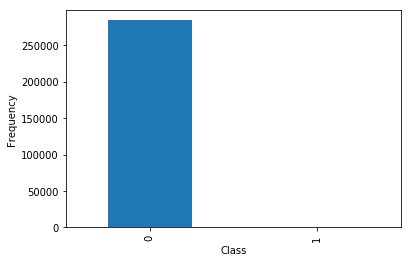

In [3]:
count_class = pd.value_counts(data['Class'], sort=True).sort_index()
count_class.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [4]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [5]:
data = data.drop(['Time','Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [7]:
#Undersampling The Data
no_of_fraud = len(data[data['Class'] == 1])
fraud_indices = np.array(data[data['Class'] == 1].index)
#print(fraud_indices)

none_fraud_indices = data[data['Class'] == 0].index
random_none_fraud_indices = np.random.choice(none_fraud_indices, no_of_fraud, replace = False)
random_none_fraud_indices = np.array(random_none_fraud_indices)
#print(random_none_fraud_indices)

undersampled_indices = np.concatenate([fraud_indices, random_none_fraud_indices])
data_undersampled = data.loc[undersampled_indices,:]
data_undersampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [8]:
len(data_undersampled[data_undersampled.Class == 0]) == len(data_undersampled[data_undersampled.Class == 1])

True

In [9]:
X_undersampled = data_undersampled.loc[:, data.columns != 'Class']
y_undersampled = data_undersampled.loc[:, data.columns == 'Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [12]:
def print_Kfold_score(X_data, y_data):
    kf = KFold(n_splits = 5)
    C = [0.01, 0.1, 1, 10, 100]
    
    result_table = pd.DataFrame(index = range(len(C), 2), columns=['C', 'Mean Recall Score'])
    result_table['C'] = C
    X = X_data.reset_index()
    y = y_data.reset_index()
    
    j = 0
    for c in C:
        print('C :', c)
        
        recall_accs = []
        for train_index, test_index in kf.split(X):
            lr = LogisticRegression(C = c, penalty='l1', solver='liblinear')
            lr.fit(X.loc[train_index,X.columns != 'index'], y.loc[train_index, 'Class'])
            
            y_pred = lr.predict(X.loc[test_index,X.columns != 'index'])
            
            recall_acc = recall_score(y.loc[test_index, 'Class'], y_pred)
            recall_accs.append(recall_acc)
        result_table.loc[j, 'Mean Recall Score'] = np.mean(recall_accs)
        j += 1
        print('Mean Recall Score : ', np.mean(recall_accs))
        
    result_table['Mean Recall Score'] = result_table['Mean Recall Score'].astype('float64')
    #return result_table[result_table['Mean Recall Score']==result_table['Mean Recall Score'].max()]['C']
    best_c = result_table.loc[result_table['Mean Recall Score'].idxmax()]['C']
    
    return best_c

In [13]:
best_c = print_Kfold_score(X_train_undersampled, y_train_undersampled)
print(best_c)

C : 0.01
Mean Recall Score :  0.9632602956053988
C : 0.1
Mean Recall Score :  0.903791865936775
C : 1
Mean Recall Score :  0.9074955696404785
C : 10
Mean Recall Score :  0.9160374160598055
C : 100
Mean Recall Score :  0.9123337123561018
0.01


In [19]:
lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled_lr = lr.predict(X_test_undersampled)
recall_acc = recall_score(y_test_undersampled, y_pred_undersampled_lr)
f1 = f1_score(y_test_undersampled, y_pred_undersampled_lr)
print(recall_acc)
print(confusion_matrix(y_test_undersampled, y_pred_undersampled_lr))
print(f1)

0.9
[[126  20]
 [ 15 135]]
0.8852459016393444


/home/sjaddya/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_pred_fulltest_lr = lr.predict(X_test)
recall_acc = recall_score(y_test, y_pred_fulltest_lr)
f1 = f1_score(y_test, y_pred_fulltest_lr)
print(recall_acc)
print(confusion_matrix(y_test, y_pred_fulltest_lr))
print(f1)

0.9558823529411765
[[75166 10141]
 [    6   130]]
0.024983184395118672


In [21]:
best_c = print_Kfold_score(X_train, y_train)
print('')
print(best_c)

C : 0.01
Mean Recall Score :  0.5436385372714486
C : 0.1
Mean Recall Score :  0.588038993161647
C : 1
Mean Recall Score :  0.6119154663174742
C : 10
Mean Recall Score :  0.6149393763034094
C : 100
Mean Recall Score :  0.6149393763034094

10.0


In [22]:
lr = LogisticRegression(C = best_c, penalty='l1')
lr.fit(X_train, y_train)

y_pred_fulldata_lr = lr.predict(X_test)
recall_acc = recall_score(y_test, y_pred_fulldata_lr)
f1 = f1_score(y_test, y_pred_fulldata_lr)
print(recall_acc)
print(confusion_matrix(y_test, y_pred_fulldata_lr))
print(f1)

/home/sjaddya/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sjaddya/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.625
[[85295    12]
 [   51    85]]
0.7296137339055795


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled_dtc = dtc.predict(X_test_undersampled)
recall_acc = recall_score(y_test_undersampled, y_pred_undersampled_dtc)
f1 = f1_score(y_test_undersampled, y_pred_undersampled_dtc)
print(recall_acc)
print(confusion_matrix(y_test_undersampled, y_pred_undersampled_dtc))
print(f1)

0.9133333333333333
[[132  14]
 [ 13 137]]
0.9102990033222591


In [25]:
y_pred_fulltest_dtc = dtc.predict(X_test)
recall_acc = recall_score(y_test, y_pred_fulltest_dtc)
f1 = f1_score(y_test, y_pred_fulltest_dtc)
print(recall_acc)
print(confusion_matrix(y_test, y_pred_fulltest_dtc))
print(f1)

0.9705882352941176
[[77273  8034]
 [    4   132]]
0.0317995663695495


In [26]:
dtc.fit(X_train, y_train)

y_pred_fulldata_dtc = dtc.predict(X_test)
recall_acc = recall_score(y_test, y_pred_fulldata_dtc)
f1 = f1_score(y_test, y_pred_fulldata_dtc)
print(recall_acc)
print(confusion_matrix(y_test, y_pred_fulldata_dtc))
print(f1)

0.7867647058823529
[[85266    41]
 [   29   107]]
0.7535211267605634
